In [1]:
import numpy as np
import matplotlib.pyplot as plt


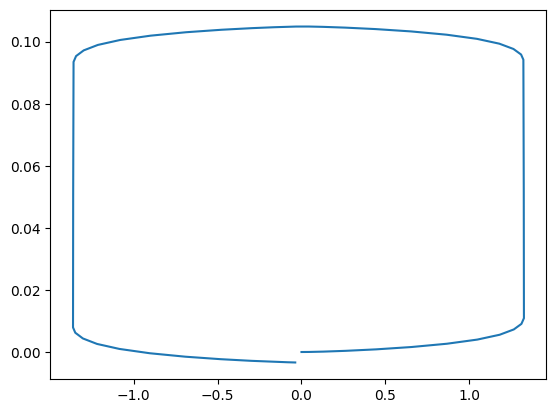

In [174]:
import numpy as np

def generate_gaussian(chop, dt, sigma):
    """
    Generate a Gaussian distribution centered within the range [0, sigma*chop].
    
    Parameters:
    - chop: Determines the window size of the Gaussian distribution.
    - dt: timestep between two entries in the x values.
    - sigma: The standard deviation of the Gaussian.
    
    Returns:
    - x: Time steps
    - y: The y values of the Gaussian distribution.
    """
    # The Gaussian is centered at sigma*chop/2, so mu is set to this value
    mu = sigma * chop / 2
    # Total length of the range
    total_length = sigma * chop
    # Number of points
    n_points = int(total_length / dt)
    if n_points % 2 == 0:
        n_points += 1
    
    # Generate x values starting from 0 to sigma*chop
    x = np.linspace(0, sigma * chop, n_points)
    # Calculate the Gaussian distribution centered at mu
    y =  np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return x, y

def generate_pause(length, dt):
    """
    Generate a pause of specified length.
    
    Parameters:
    - length: The length of the pause.
    - dt: timestep between two entries in the x values.
    
    Returns:
    - x: Time steps
    - y: The y values of the pause.
    """
    # Generate x values starting from 0 to length
    x = np.arange(0, length + dt, dt)
    # The pause has a constant value of 0
    y = np.zeros_like(x)
    return x, y

def merge_gaussians_and_pauses(x_lists, y_lists):
    # Initialize empty arrays for the merged lists
    merged_x = np.array([])
    merged_y = np.array([])

    # Initialize a variable to keep track of the current end of the last x range
    current_x_end = 0

    for x, y in zip(x_lists, y_lists):
        # Adjust the current x list to continue from the current end
        adjusted_x = current_x_end + np.array(x)

        # Append the adjusted x values and y values to the merged lists
        merged_x = np.concatenate((merged_x, adjusted_x))
        merged_y = np.concatenate((merged_y, y))
        
        # Update the current end of the x range
        current_x_end = adjusted_x[-1] + (adjusted_x[1] - adjusted_x[0])  # Increment by the last step in x

    return merged_x, merged_y

def integrate_gaussian_up_to(x, y, up_to_time):
    """
    Integrate the pre-generated Gaussian distribution up to a specified time.
    
    Parameters:
    - x, y: Pre-generated x and y values of the Gaussian distribution.
    - up_to_time: The time (x value) until which to integrate the Gaussian.
    
    Returns:
    - integral_up_to: The value of the integral up to the specified time.
    """
    # Find the index of the closest value in x to the specified up_to_time
    idx_up_to = np.searchsorted(x, up_to_time)
    # Integrate up to this index
    integral_up_to = np.trapz(y[:idx_up_to+1], x[:idx_up_to+1])
    return integral_up_to

def dispersive_evolution(t, chi):
    """
    Calculate the dispersive evolution of the state.
    
    Parameters:
    - t: The time at which to calculate the dispersive evolution.
    
    Returns:
    - dispersive_evolution: The value of the dispersive evolution at the specified time.
    """
    dispersive_evolution = np.exp(-1j * chi * t)
    return dispersive_evolution

# System parameters
chi = 0.05 * 2 * np.pi
epsilon = 50

# Gaussian Parameters
chop = 4
dt = 4e-3
sigma = 11e-3
t_p = sigma * chop

# Generate the Gaussian once
x_gaussian, y_gaussian = generate_gaussian(chop, dt, sigma)

# Generate a pause
t_w = 200e-3
x_pause, y_pause = generate_pause(t_w, dt)

# create the experiment pulse
scaling = (1+np.exp(0.5j*chi*(3*t_p+2*t_w)))/(np.exp(0.5j*chi*(t_p+t_w))+np.exp(0.5j*chi*(2*t_p+t_w)))
x_list = [x_gaussian, x_pause, x_gaussian, x_gaussian, x_pause, x_gaussian]
y_list = [y_gaussian, y_pause, -scaling*y_gaussian, -scaling*y_gaussian, y_pause, y_gaussian]

x, y = merge_gaussians_and_pauses(x_list, y_list)

# multiply by drive strength
y = epsilon*y

dispersive_evolution_list = [dispersive_evolution(x_value, chi) for x_value in x]

pulse_and_phase_evolution = [y_value * dispersive_evolution for y_value, dispersive_evolution in zip(y, dispersive_evolution_list)]

# integrate pulse_and_phase_evolution to find the phase space trajectory

trajectory = []
for x_value in x:
    trajectory.append(dispersive_evolution(x_value,-chi)*integrate_gaussian_up_to(x, pulse_and_phase_evolution, x_value))

plt.plot(np.real(trajectory), np.imag(trajectory))

#plt.plot(x,np.abs(trajectory))



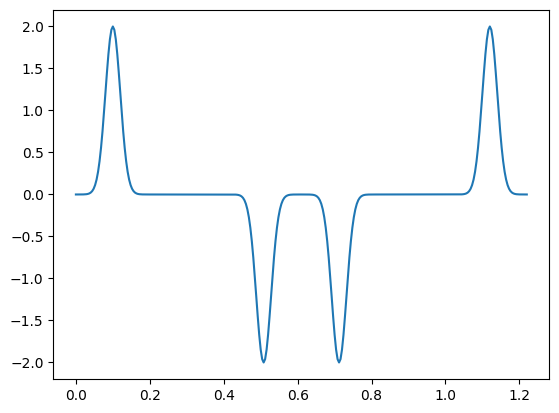

In [144]:
plt.plot(x,y)

In [165]:
(1+np.exp(0.5j*chi*(3*t_p+2*t_w)))/(np.exp(0.5j*chi*(t_p+t_w))+np.exp(0.5j*chi*(t_p+3*t_w)))

(0.9992297503125519-0.027945921121061312j)

In [163]:
np.exp(0.5j*chi*(3*t_p+2*t_w))

(0.9965103628403676+0.08346913652218263j)

In [161]:
np.exp(0.5j*chi*(t_p+3*t_w))

(0.9948877614647814+0.10098684116060017j)

In [162]:
np.exp(0.5j*chi*(t_p+t_w))

(0.9992655939501207+0.03831804728209006j)